In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ### ----------- Just testing (ignore) --------------------- 
# from sklearn.linear_model import LinearRegression
# from sklearn.datasets import make_regression
# X, y = make_regression(n_samples=40, n_features=4, noise=3.0, random_state=42)
# model = LinearRegression().fit(X, y)
# pred = model.predict(X[:3])
# print("sklearn version:", sklearn.__version__)
# print("coef shape:", model.coef_.shape)
# print("sample predictions: ", np.round(pred,2))

In [4]:
df_raw = pd.read_csv('data.csv')
df_raw.head(10)

,統計期,投保單位[個],投保人數對象[人],醫療費用核付/總計/件數[千件],醫療費用核付/總計/金額[百萬元],醫療費用核付/住院/件數[千件],醫療費用核付/門診/件數[千件],醫療費用核付/住院/金額[百萬元],醫療費用核付/門診/金額[百萬元]
0,84年,95775,3871212,0,0,0,0,0,0
1,85年,101951,3989400,0,0,0,0,0,0
2,86年,106082,4057159,38602,47885,436,19237,38166,28648
3,87年,110119,4072541,38604,48822,395,19023,38209,29799
4,88年,115306,4108252,37201,40007,293,12463,36908,27544
5,89年,124806,4195952,41775,55529,469,21618,41307,33911
6,90年,125022,4263321,39948,51875,435,20172,39512,31703
7,91年,127475,4294157,44448,0,540,0,43908,0
8,92年,124849,4257765,41417,0,471,0,40946,0
9,93年,126994,4267835,46391,0,544,0,45846,0


In [5]:
col_map = {
    "統計期": "year",
    "投保單位[個]": "insured_units",
    "投保人數對象[人]": "insured_persons",
    "醫療費用核付/總計/件數[千件]": "claims_total_cnt_k",
    "醫療費用核付/總計/金額[百萬元]": "claims_total_amt_m",
    "醫療費用核付/住院/件數[千件]": "claims_inpatient_cnt_k",
    "醫療費用核付/門診/件數[千件]": "claims_outpatient_cnt_k",
    "醫療費用核付/住院/金額[百萬元]": "claims_inpatient_amt_m",
    "醫療費用核付/門診/金額[百萬元]": "claims_outpatient_amt_m",
}

df = df_raw.rename(columns=col_map)
df.head()

,year,insured_units,insured_persons,claims_total_cnt_k,claims_total_amt_m,claims_inpatient_cnt_k,claims_outpatient_cnt_k,claims_inpatient_amt_m,claims_outpatient_amt_m
0,84年,95775,3871212,0,0,0,0,0,0
1,85年,101951,3989400,0,0,0,0,0,0
2,86年,106082,4057159,38602,47885,436,19237,38166,28648
3,87年,110119,4072541,38604,48822,395,19023,38209,29799
4,88年,115306,4108252,37201,40007,293,12463,36908,27544


In [6]:
df["year"] = df["year"].str.replace("年", "", regex=False).astype(int)
df["year"] = df["year"].astype(int) + 1911
df.head()

,year,insured_units,insured_persons,claims_total_cnt_k,claims_total_amt_m,claims_inpatient_cnt_k,claims_outpatient_cnt_k,claims_inpatient_amt_m,claims_outpatient_amt_m
0,1995,95775,3871212,0,0,0,0,0,0
1,1996,101951,3989400,0,0,0,0,0,0
2,1997,106082,4057159,38602,47885,436,19237,38166,28648
3,1998,110119,4072541,38604,48822,395,19023,38209,29799
4,1999,115306,4108252,37201,40007,293,12463,36908,27544


In [7]:
first_valid_indx = df['claims_total_amt_m'].ne(0).idxmax()
df = df.loc[first_valid_indx:].reset_index(drop=True)

In [8]:
df = df.replace(0, np.nan)
df[:]

,year,insured_units,insured_persons,claims_total_cnt_k,claims_total_amt_m,claims_inpatient_cnt_k,claims_outpatient_cnt_k,claims_inpatient_amt_m,claims_outpatient_amt_m
0,1997,106082,4057159,38602,47885.0,436,19237.0,38166,28648.0
1,1998,110119,4072541,38604,48822.0,395,19023.0,38209,29799.0
2,1999,115306,4108252,37201,40007.0,293,12463.0,36908,27544.0
3,2000,124806,4195952,41775,55529.0,469,21618.0,41307,33911.0
4,2001,125022,4263321,39948,51875.0,435,20172.0,39512,31703.0
5,2002,127475,4294157,44448,NaN,540,NaN,43908,NaN
6,2003,124849,4257765,41417,NaN,471,NaN,40946,NaN
7,2004,126994,4267835,46391,NaN,544,NaN,45846,NaN
8,2005,130329,4304930,46721,NaN,526,NaN,46194,NaN
9,2006,133344,4329783,45087,71078.0,515,27288.0,44573,43790.0


In [9]:
df["total_cost_per_person"] = df["claims_total_amt_m"] * 1e6 / df["insured_persons"]
df["impatient_cost_per_person"] = df["claims_inpatient_amt_m"] * 1e6 / df["insured_persons"]
df["outpatient_cost_per_person"] = df["claims_outpatient_amt_m"] * 1e6 / df["insured_persons"]


In [10]:
df.shape

(27, 12)

In [11]:
total_cnt = df["claims_total_cnt_k"] * 1e3
inpatient_cnt = df["claims_inpatient_cnt_k"] * 1e3
outpatient_cnt = df["claims_outpatient_cnt_k"] * 1e3

# outpatient_cnt = outpatient_cnt.replace(0, np.nan)  # Some values are zero replace them with NaN to avoid division by zero

df["avg_cost_per_claim"] = (df["claims_total_amt_m"] * 1e6) / total_cnt
df["avg_impatient_cost_per_claim"] = (df["claims_inpatient_amt_m"] * 1e6) / inpatient_cnt
df["avg_outpatient_cost_per_claim"] = (df["claims_outpatient_amt_m"] * 1e6) / outpatient_cnt

In [12]:
df[["avg_cost_per_claim", "avg_impatient_cost_per_claim", "avg_outpatient_cost_per_claim"]].head(10)


,avg_cost_per_claim,avg_impatient_cost_per_claim,avg_outpatient_cost_per_claim
0,1240.479768,87536.697248,1489.213495
1,1264.687597,96731.645570,1566.472165
2,1075.428080,125965.870307,2210.061783
3,1329.239976,88074.626866,1568.646498
4,1298.563132,90832.183908,1571.633948
5,NaN,81311.111111,NaN
6,NaN,86934.182590,NaN
7,NaN,84275.735294,NaN
8,NaN,87821.292776,NaN
9,1576.463282,86549.514563,1604.734682


In [13]:
share = df["claims_total_amt_m"].replace(0, np.nan)

df["inpatient_share_amount"] = df["claims_inpatient_amt_m"] / share
df["outpatient_share_amount"] = df["claims_outpatient_amt_m"] / share

df[["inpatient_share_amount", "outpatient_share_amount"]].head(10)

,inpatient_share_amount,outpatient_share_amount
0,0.797035,0.598267
1,0.782618,0.610360
2,0.922539,0.688480
3,0.743882,0.610690
4,0.761677,0.611142
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,0.627100,0.616084


In [14]:
df[[
    "year",
    "claims_total_amt_m",
    "total_cost_per_person",
    "avg_cost_per_claim",
    "inpatient_share_amount",
    "outpatient_share_amount"
]].head()

,year,claims_total_amt_m,total_cost_per_person,avg_cost_per_claim,inpatient_share_amount,outpatient_share_amount
0,1997,47885.0,11802.593884,1240.479768,0.797035,0.598267
1,1998,48822.0,11988.092938,1264.687597,0.782618,0.610360
2,1999,40007.0,9738.204959,1075.428080,0.922539,0.688480
3,2000,55529.0,13233.945479,1329.239976,0.743882,0.610690
4,2001,51875.0,12167.744348,1298.563132,0.761677,0.611142


In [15]:
# one-year lags
lag_cols = [
    "claims_total_amt_m",
    "claims_inpatient_amt_m",
    "claims_outpatient_amt_m",
    "insured_persons",
    "total_cost_per_person",
    "inpatient_share_amount",
    "outpatient_share_amount",
]

for col in lag_cols:
    df[f"{col}_lag1"] = df[col].shift(1)

In [16]:
df.head(10)

,year,insured_units,insured_persons,claims_total_cnt_k,claims_total_amt_m,claims_inpatient_cnt_k,claims_outpatient_cnt_k,claims_inpatient_amt_m,claims_outpatient_amt_m,total_cost_per_person,...,avg_outpatient_cost_per_claim,inpatient_share_amount,outpatient_share_amount,claims_total_amt_m_lag1,claims_inpatient_amt_m_lag1,claims_outpatient_amt_m_lag1,insured_persons_lag1,total_cost_per_person_lag1,inpatient_share_amount_lag1,outpatient_share_amount_lag1
0,1997,106082,4057159,38602,47885.0,436,19237.0,38166,28648.0,11802.593884,...,1489.213495,0.797035,0.598267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998,110119,4072541,38604,48822.0,395,19023.0,38209,29799.0,11988.092938,...,1566.472165,0.782618,0.610360,47885.0,38166.0,28648.0,4057159.0,11802.593884,0.797035,0.598267
2,1999,115306,4108252,37201,40007.0,293,12463.0,36908,27544.0,9738.204959,...,2210.061783,0.922539,0.688480,48822.0,38209.0,29799.0,4072541.0,11988.092938,0.782618,0.610360
3,2000,124806,4195952,41775,55529.0,469,21618.0,41307,33911.0,13233.945479,...,1568.646498,0.743882,0.610690,40007.0,36908.0,27544.0,4108252.0,9738.204959,0.922539,0.688480
4,2001,125022,4263321,39948,51875.0,435,20172.0,39512,31703.0,12167.744348,...,1571.633948,0.761677,0.611142,55529.0,41307.0,33911.0,4195952.0,13233.945479,0.743882,0.610690
5,2002,127475,4294157,44448,NaN,540,NaN,43908,NaN,NaN,...,NaN,NaN,NaN,51875.0,39512.0,31703.0,4263321.0,12167.744348,0.761677,0.611142
6,2003,124849,4257765,41417,NaN,471,NaN,40946,NaN,NaN,...,NaN,NaN,NaN,NaN,43908.0,NaN,4294157.0,NaN,NaN,NaN
7,2004,126994,4267835,46391,NaN,544,NaN,45846,NaN,NaN,...,NaN,NaN,NaN,NaN,40946.0,NaN,4257765.0,NaN,NaN,NaN
8,2005,130329,4304930,46721,NaN,526,NaN,46194,NaN,NaN,...,NaN,NaN,NaN,NaN,45846.0,NaN,4267835.0,NaN,NaN,NaN
9,2006,133344,4329783,45087,71078.0,515,27288.0,44573,43790.0,16416.065193,...,1604.734682,0.627100,0.616084,NaN,46194.0,NaN,4304930.0,NaN,NaN,NaN


In [17]:
def growth_rate(column):
    # Avoid deprecated default forward-fill; keep gaps as NaN
    return column.pct_change(fill_method=None)


df["gr_insured_persons"] = growth_rate(df["insured_persons"])
df["gr_claims_total_amt_m"] = growth_rate(df["claims_total_amt_m"])
df["gr_inpatient_amt_m"] = growth_rate(df["claims_inpatient_amt_m"])
df["gr_outpatient_amt_m"] = growth_rate(df["claims_outpatient_amt_m"])


In [18]:
df.head()

,year,insured_units,insured_persons,claims_total_cnt_k,claims_total_amt_m,claims_inpatient_cnt_k,claims_outpatient_cnt_k,claims_inpatient_amt_m,claims_outpatient_amt_m,total_cost_per_person,...,claims_inpatient_amt_m_lag1,claims_outpatient_amt_m_lag1,insured_persons_lag1,total_cost_per_person_lag1,inpatient_share_amount_lag1,outpatient_share_amount_lag1,gr_insured_persons,gr_claims_total_amt_m,gr_inpatient_amt_m,gr_outpatient_amt_m
0,1997,106082,4057159,38602,47885.0,436,19237.0,38166,28648.0,11802.593884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998,110119,4072541,38604,48822.0,395,19023.0,38209,29799.0,11988.092938,...,38166.0,28648.0,4057159.0,11802.593884,0.797035,0.598267,0.003791,0.019568,0.001127,0.040177
2,1999,115306,4108252,37201,40007.0,293,12463.0,36908,27544.0,9738.204959,...,38209.0,29799.0,4072541.0,11988.092938,0.782618,0.610360,0.008769,-0.180554,-0.034050,-0.075674
3,2000,124806,4195952,41775,55529.0,469,21618.0,41307,33911.0,13233.945479,...,36908.0,27544.0,4108252.0,9738.204959,0.922539,0.688480,0.021347,0.387982,0.119188,0.231157
4,2001,125022,4263321,39948,51875.0,435,20172.0,39512,31703.0,12167.744348,...,41307.0,33911.0,4195952.0,13233.945479,0.743882,0.610690,0.016056,-0.065803,-0.043455,-0.065112


In [19]:
# cols_to_drop = [
#     "gr_insured_persons",
#     "gr_claims_total_amt_m",
#     "gr_inpatient_amt_m",
#     "gr_outpatient_amt_m",
# ]

# df = df.drop(columns=cols_to_drop, errors="ignore")
# df.head()

In [20]:
# pd.set_option("display.max_columns", None)
# df[:]

In [21]:
# output_path = "EDA_output.csv"

# df.to_csv(output_path, index=False, encoding="utf-8-sig")
# output_path, df.shape

In [22]:
df_plot = df.copy()
df_plot = df_plot.set_index("year").interpolate(method='linear').reset_index()
df_plot.head(10)

,year,insured_units,insured_persons,claims_total_cnt_k,claims_total_amt_m,claims_inpatient_cnt_k,claims_outpatient_cnt_k,claims_inpatient_amt_m,claims_outpatient_amt_m,total_cost_per_person,...,claims_inpatient_amt_m_lag1,claims_outpatient_amt_m_lag1,insured_persons_lag1,total_cost_per_person_lag1,inpatient_share_amount_lag1,outpatient_share_amount_lag1,gr_insured_persons,gr_claims_total_amt_m,gr_inpatient_amt_m,gr_outpatient_amt_m
0,1997,106082,4057159,38602,47885.0,436,19237.0,38166,28648.0,11802.593884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998,110119,4072541,38604,48822.0,395,19023.0,38209,29799.0,11988.092938,...,38166.0,28648.0,4057159.0,11802.593884,0.797035,0.598267,0.003791,0.019568,0.001127,0.040177
2,1999,115306,4108252,37201,40007.0,293,12463.0,36908,27544.0,9738.204959,...,38209.0,29799.0,4072541.0,11988.092938,0.782618,0.610360,0.008769,-0.180554,-0.034050,-0.075674
3,2000,124806,4195952,41775,55529.0,469,21618.0,41307,33911.0,13233.945479,...,36908.0,27544.0,4108252.0,9738.204959,0.922539,0.688480,0.021347,0.387982,0.119188,0.231157
4,2001,125022,4263321,39948,51875.0,435,20172.0,39512,31703.0,12167.744348,...,41307.0,33911.0,4195952.0,13233.945479,0.743882,0.610690,0.016056,-0.065803,-0.043455,-0.065112
5,2002,127475,4294157,44448,55715.6,540,21595.2,43908,34120.4,13017.408517,...,39512.0,31703.0,4263321.0,12167.744348,0.761677,0.611142,0.007233,-0.040983,0.111257,-0.038000
6,2003,124849,4257765,41417,59556.2,471,23018.4,40946,36537.8,13867.072686,...,43908.0,34120.4,4294157.0,13017.408517,0.734762,0.612130,-0.008475,-0.016162,-0.067459,-0.010889
7,2004,126994,4267835,46391,63396.8,544,24441.6,45846,38955.2,14716.736855,...,40946.0,36537.8,4257765.0,13867.072686,0.707846,0.613119,0.002365,0.008658,0.119670,0.016222
8,2005,130329,4304930,46721,67237.4,526,25864.8,46194,41372.6,15566.401024,...,45846.0,38955.2,4267835.0,14716.736855,0.680931,0.614107,0.008692,0.033479,0.007591,0.043334
9,2006,133344,4329783,45087,71078.0,515,27288.0,44573,43790.0,16416.065193,...,46194.0,41372.6,4304930.0,15566.401024,0.654015,0.615095,0.005773,0.058299,-0.035091,0.070445


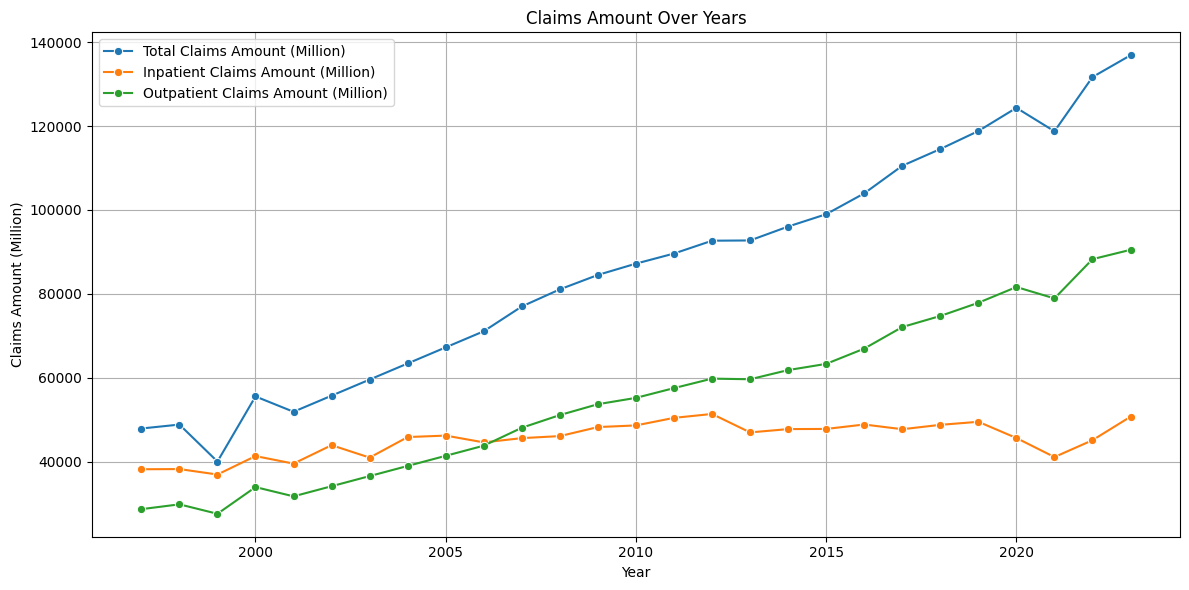

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x="year", y="claims_total_amt_m", marker="o", label="Total Claims Amount (Million)")
sns.lineplot(data=df_plot, x="year", y="claims_inpatient_amt_m", marker="o", label="Inpatient Claims Amount (Million)")
sns.lineplot(data=df_plot, x="year", y="claims_outpatient_amt_m", marker="o", label="Outpatient Claims Amount (Million)")
# plt.plot(df_plot["year"], df_plot["claims_total_amt_m"], marker="o", label="Total")
# plt.plot(df_plot["year"], df_plot["claims_inpatient_amt_m"], marker="o", label="Inpatient")
# plt.plot(df_plot["year"], df_plot["claims_outpatient_amt_m"], marker="o", label="Outpatient")

plt.title("Claims Amount Over Years")
plt.xlabel("Year")
plt.ylabel("Claims Amount (Million)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

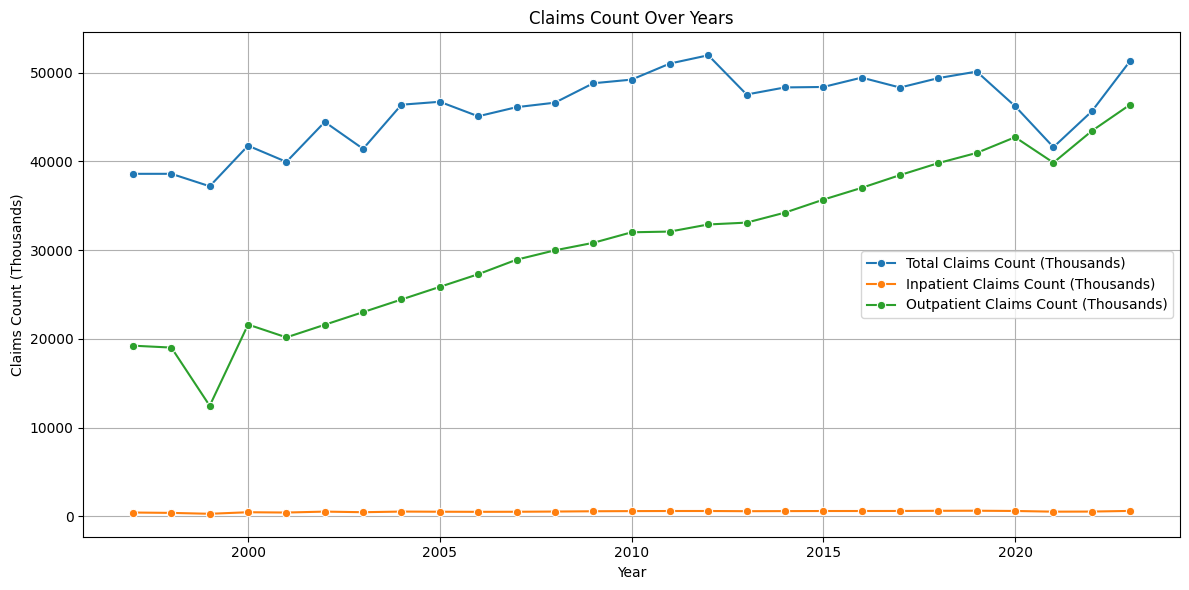

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x="year", y="claims_total_cnt_k", marker="o", label="Total Claims Count (Thousands)")
sns.lineplot(data=df_plot, x="year", y="claims_inpatient_cnt_k", marker="o", label="Inpatient Claims Count (Thousands)")
sns.lineplot(data=df_plot, x="year", y="claims_outpatient_cnt_k", marker="o", label="Outpatient Claims Count (Thousands)")

plt.title("Claims Count Over Years")
plt.xlabel("Year")
plt.ylabel("Claims Count (Thousands)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

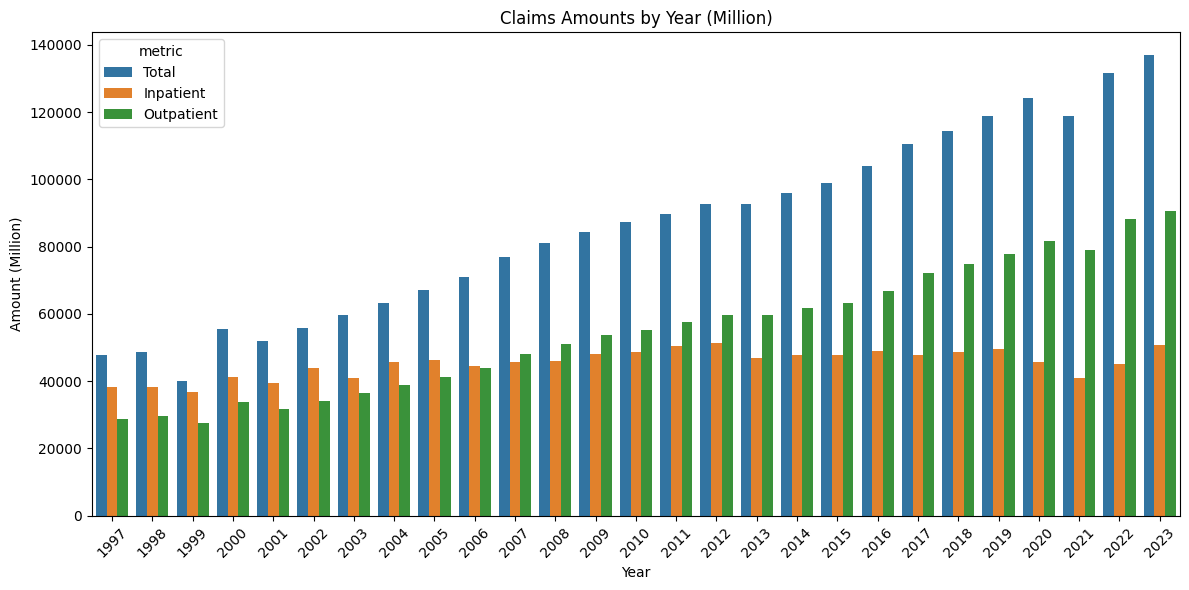

In [25]:
amount_cols = ["claims_total_amt_m","claims_inpatient_amt_m","claims_outpatient_amt_m"]
label_map_amt = {"claims_total_amt_m":"Total",
                 "claims_inpatient_amt_m":"Inpatient",
                 "claims_outpatient_amt_m":"Outpatient"}

df_bar = df.copy().set_index("year").interpolate("linear").reset_index()

long_amt = df_bar.melt("year", amount_cols, "metric","amount_m")
long_amt["metric"] = long_amt["metric"].map(label_map_amt)

plt.figure(figsize=(12,6))
sns.barplot(data=long_amt, x="year", y="amount_m", hue="metric")
plt.title("Claims Amounts by Year (Million)")
plt.xlabel("Year"); plt.ylabel("Amount (Million)")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

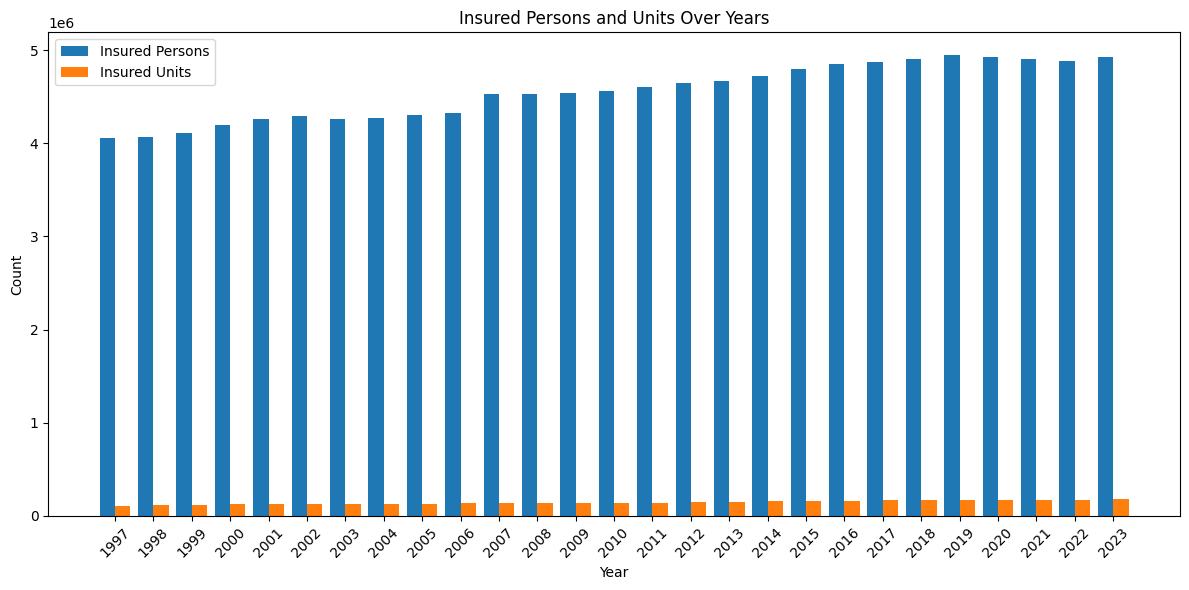

In [26]:
years = df_plot["year"]
x = np.arange(len(years))  # the label locations
width = 0.4  # the width of the bars

plt.figure(figsize=(12,6))
plt.bar(x - width/2, df_plot["insured_persons"], width, label='Insured Persons')
plt.bar(x + width/2, df_plot["insured_units"], width, label='Insured Units')

plt.title("Insured Persons and Units Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(ticks=x, labels=years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

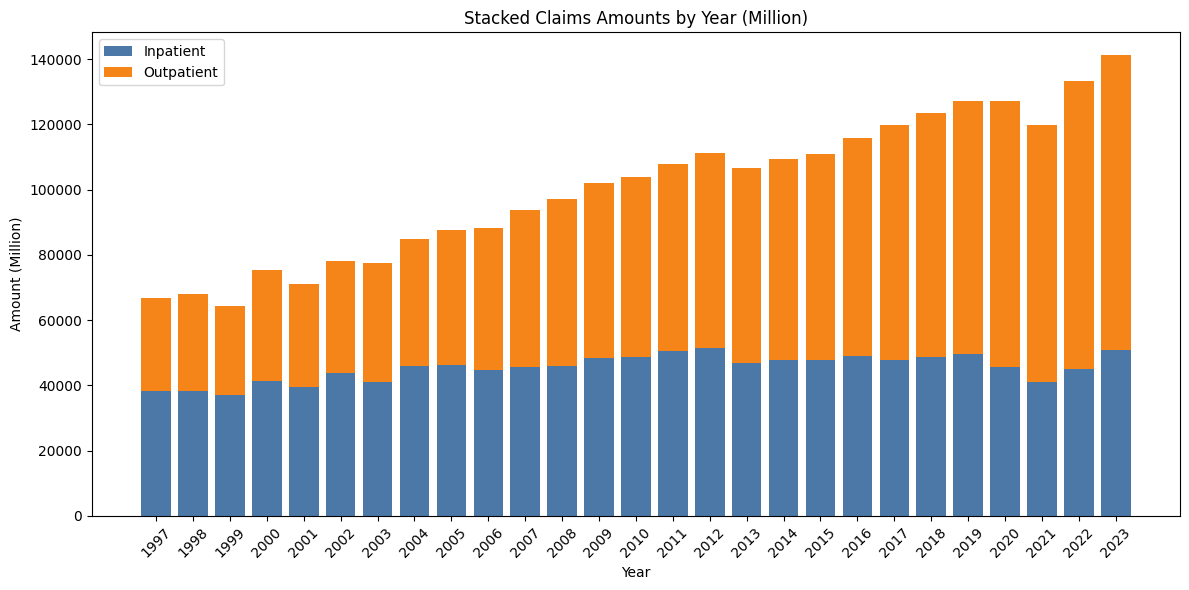

In [27]:
# Stacked bars: inpatient + outpatient amounts by year
x = df_bar["year"].astype(str)
inpatient = df_bar["claims_inpatient_amt_m"].fillna(0)
outpatient = df_bar["claims_outpatient_amt_m"].fillna(0)

plt.figure(figsize=(12, 6))
plt.bar(x, inpatient, label="Inpatient", color="#4C78A8")
plt.bar(x, outpatient, bottom=inpatient, label="Outpatient", color="#F58518")
plt.title("Stacked Claims Amounts by Year (Million)")
plt.xlabel("Year")
plt.ylabel("Amount (Million)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Train/Test Split

In [28]:
df.head(10)

,year,insured_units,insured_persons,claims_total_cnt_k,claims_total_amt_m,claims_inpatient_cnt_k,claims_outpatient_cnt_k,claims_inpatient_amt_m,claims_outpatient_amt_m,total_cost_per_person,...,claims_inpatient_amt_m_lag1,claims_outpatient_amt_m_lag1,insured_persons_lag1,total_cost_per_person_lag1,inpatient_share_amount_lag1,outpatient_share_amount_lag1,gr_insured_persons,gr_claims_total_amt_m,gr_inpatient_amt_m,gr_outpatient_amt_m
0,1997,106082,4057159,38602,47885.0,436,19237.0,38166,28648.0,11802.593884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998,110119,4072541,38604,48822.0,395,19023.0,38209,29799.0,11988.092938,...,38166.0,28648.0,4057159.0,11802.593884,0.797035,0.598267,0.003791,0.019568,0.001127,0.040177
2,1999,115306,4108252,37201,40007.0,293,12463.0,36908,27544.0,9738.204959,...,38209.0,29799.0,4072541.0,11988.092938,0.782618,0.610360,0.008769,-0.180554,-0.034050,-0.075674
3,2000,124806,4195952,41775,55529.0,469,21618.0,41307,33911.0,13233.945479,...,36908.0,27544.0,4108252.0,9738.204959,0.922539,0.688480,0.021347,0.387982,0.119188,0.231157
4,2001,125022,4263321,39948,51875.0,435,20172.0,39512,31703.0,12167.744348,...,41307.0,33911.0,4195952.0,13233.945479,0.743882,0.610690,0.016056,-0.065803,-0.043455,-0.065112
5,2002,127475,4294157,44448,NaN,540,NaN,43908,NaN,NaN,...,39512.0,31703.0,4263321.0,12167.744348,0.761677,0.611142,0.007233,NaN,0.111257,NaN
6,2003,124849,4257765,41417,NaN,471,NaN,40946,NaN,NaN,...,43908.0,NaN,4294157.0,NaN,NaN,NaN,-0.008475,NaN,-0.067459,NaN
7,2004,126994,4267835,46391,NaN,544,NaN,45846,NaN,NaN,...,40946.0,NaN,4257765.0,NaN,NaN,NaN,0.002365,NaN,0.119670,NaN
8,2005,130329,4304930,46721,NaN,526,NaN,46194,NaN,NaN,...,45846.0,NaN,4267835.0,NaN,NaN,NaN,0.008692,NaN,0.007591,NaN
9,2006,133344,4329783,45087,71078.0,515,27288.0,44573,43790.0,16416.065193,...,46194.0,NaN,4304930.0,NaN,NaN,NaN,0.005773,NaN,-0.035091,NaN
